In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [45]:
import sklearn

In [3]:
%matplotlib inline
%config lnlineBackend.figure_formats = {'png', 'retina'}

In [4]:
target = pd.DataFrame(boston.target, columns=["LOAD"])
target.head()

,LOAD
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
datas = pd.DataFrame(boston.data, columns=boston.feature_names)
datas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
tot = pd.concat([datas, target], axis=1)
tot.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOAD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
x = np.array(tot['RM'])
y = np.array(tot['LOAD'])

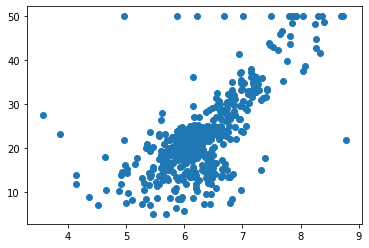

In [8]:
plt.scatter(x,y)

In [9]:
avg_x = np.average(x)
avg_y = np.average(y)

In [10]:
var_x = [(avg_x - i) for i in x]
var_y = [(avg_y - i) for i in y]

In [11]:
sxx_list = [a * b for a ,b in zip(var_x,var_x)]
sxx = np.sum(sxx_list)

sxy_list = [a * b for a ,b in zip(var_x,var_y)]
sxy = np.sum(sxy_list)

In [12]:
m = sxy / sxx
b = avg_y - (m * avg_x)

In [13]:
def predict(x):
    return m*x + b

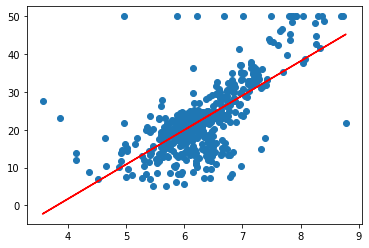

In [14]:
plt.scatter(x,y)
plt.plot(tot['RM'],predict(tot['RM']), color='red')

In [ ]:
# design matrix
# np linalg inv

In [14]:
m_x = tot['RM'].to_frame()
m_x.insert(0, 'Const', 1)
m_x.head()

,Const,RM
0,1,6.575
1,1,6.421
2,1,7.185
3,1,6.998
4,1,7.147


In [32]:
w = np.linalg.inv(m_x.T @ m_x) @ m_x.T @ boston.target
w

0   -34.670621
1     9.102109
dtype: float64

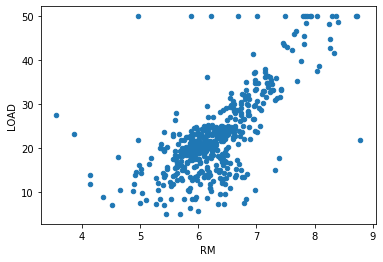

In [37]:
tot.plot(kind='scatter', x='RM', y='LOAD')

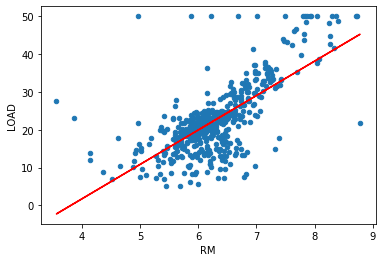

In [38]:
tot.plot(kind='scatter', x='RM', y='LOAD')
plt.plot(tot['RM'], (tot['RM'] * w[1]) + w[0], color='red')

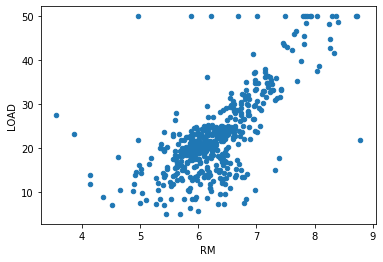

In [16]:
tot.plot(kind='scatter', x='RM', y='LOAD')

In [17]:
lr = sklearn.LinearRegression()
lr.fit(X=pd.DataFrame(tot['RM']), y=tot['LOAD'])
prediction = lr.predict(X=pd.DataFrame(tot['RM']))

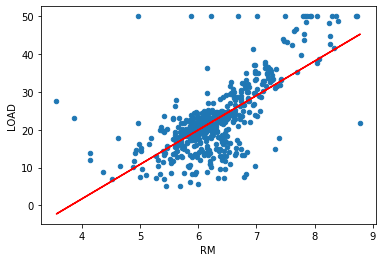

In [18]:
tot.plot(kind='scatter', x='RM', y='LOAD')
plt.plot(tot['RM'], prediction, color='red')

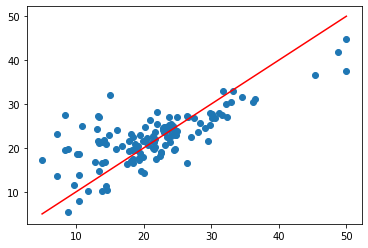

In [63]:
rm = tot['RM'].to_frame()
load = tot['LOAD'].to_frame()
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(rm, load)
train_lr = sklearn.linear_model.LinearRegression(fit_intercept = True) 
train_lr.fit(train_x, train_y) 
pred_y = train_lr.predict(test_x)

plt.scatter(test_y, pred_y) 
line = np.linspace(test_y.min(), test_y.max(), 1000)
plt.plot(line, line, color='red')